<a href="https://colab.research.google.com/github/D4rc0r/TareasProcesamientoDigital/blob/main/Comparacion_entre_trasformadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparacion entre las transformadas 

*   Fourier
*   Tiempo corto de fourier
*   Wavelet





## Transformada de Fourier






$$
F(\omega)=\int_{-\infty}^{\infty} f(t) e^{-i \omega t} d t
$$

$$
\hat{f}(x)=\frac{1}{2 \pi} \int_{-\infty}^{\infty} F(\omega) e^{i \omega t} d \omega .
$$
La ventaja de esta transformada es que al ser continua en el tiempo se tiene una muestra completa para la interpretacion en frecuencia.

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

A1 = 10
A2 = 10
F1 = 60   
F2 = 300   
N = 8192  # length of the signal

# generate signal
k = np.arange(N)
x = sig.chirp(k, 0.01, N, .49)


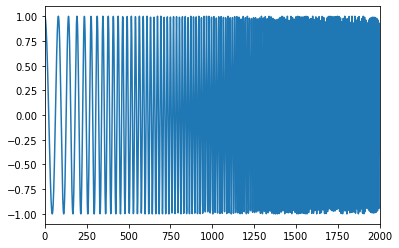

In [ ]:
plt.plot(x)
plt.xlim([0,2000])
plt.show()

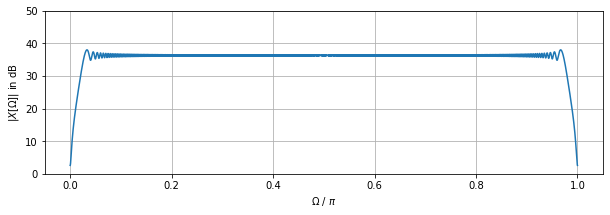

In [ ]:

# compute and plot magnitude spectrum
plt.figure(figsize = (10, 3))
f = np.fft.rfftfreq(N, 1/2)
plt.plot(f, 20*np.log10(abs(np.fft.rfft(x))))
plt.xlabel(r'$\Omega$ / $\pi$')
plt.ylabel(r'$|X[\Omega]|$ in dB')
plt.ylim([0, 50])
plt.grid()

El principal problema se presenta cuando la señal cambia la frecuencia en diferentes intervalos pequeños o ventanas, estos no se perciben.

##Transformada en tiempo corto de Fourier






$$
F(\omega, u)=\int_{-\infty}^{\infty} f(t) h(t-u) e^{-i \omega t} d t
$$

Se conoce como espectograma y se usa para analizar señales en el dominio tiempo-frecuencia ,es decir un analizaor de espectro

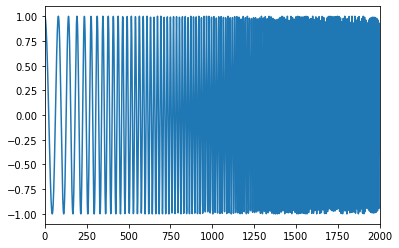

In [ ]:
plt.plot(x)
plt.xlim([0,2000])
plt.show()

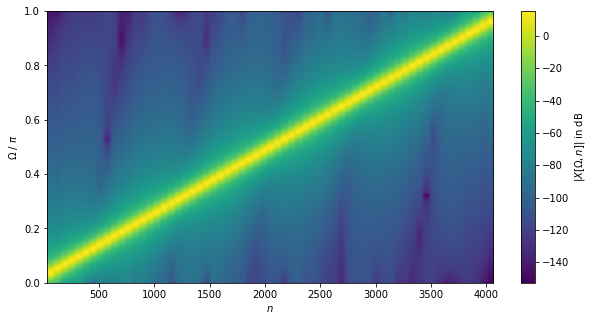

In [ ]:
L = 256  # length of one segment 
overlap = 128  # 256
               # no hay una regla para el traslape pero se fijara en la mitad 
plt.figure(figsize = (10, 5))
plt.specgram(x, NFFT=L, Fs=2, noverlap=overlap, sides='onesided')
plt.xlabel(r'$n$') 
plt.ylabel(r'$\Omega$ / $\pi$')
cb = plt.colorbar()
cb.set_label(r'$|X[\Omega,n]|$ in dB')
plt.autoscale(tight=True)

La frecuencia crece lineal y si se promedia por columnas se debe llegar al espectro de fourier

Se tiene una ventana deslizante donde la base es fourier,
de esta manera se pueden diferentes tipos de ventanas de las que pueden distinguirse la ventana Hanning, hamming, cosenoidales, Gaussianas.

De esta manera hay mayores posibilidades en cuanto a su aplicacion voz, imagen potencia o señales cerebrales

## Transformada wavelet



Ahora la ventana deslizante parte de una funcion madre que por ejemplo puede resultar de una funcion Gaussiana al aplicar la segunda derivada (funcion sombrero mexicano) a la cual se le transforma la dilatación y traslación conservando la energia en el proceso

$$
T\left(s_{n}, u_{n}\right)=\int_{-\infty}^{\infty} f(t) \frac{1}{\sqrt{s_{n}} \pi^{1 / 4}} e^{\frac{-1}{2}\left[\left(t-u_{n}\right)^{2} / s_{n}^{2}\right]} e^{-i 2 \pi\left(\xi_{0} / s_{n}\right)\left(t-u_{n}\right)} d t
$$

Al ser en tiempo corto esta transformada tiene ciertas ventajas, generaliza el concepto de frecuencia a otros términos como compresión/alargamiento y traslación, se usa para muchas cosas como el ser aplicada en una señal cerebral a lo largo del tiempo donde la informacion este en la banda alfa 8-14 Hz  o beta 12-30 Hz

In [ ]:
#Ayuda de código:
#Cargar datos EEG e instalar librería mne (manipulación básica eeg)

# Cargar base de datos
#id del archivo: 1sui-FJI5znNJuQOk0whM6PALI89XfKss
FILEID = "1sui-FJI5znNJuQOk0whM6PALI89XfKss"
#1sui-FJI5znNJuQOk0whM6PALI89XfKss
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O codigos.zip && rm -rf /tmp/cookies.txt
!unzip codigos.zip
!dir
!pip install mne==0.19

--2022-02-02 22:55:06--  https://docs.google.com/uc?export=download&confirm=BC0a&id=1sui-FJI5znNJuQOk0whM6PALI89XfKss
Resolving docs.google.com (docs.google.com)... 142.250.65.78, 2607:f8b0:4004:832::200e
Connecting to docs.google.com (docs.google.com)|142.250.65.78|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0s-3g-docs.googleusercontent.com/docs/securesc/mbkhgigqve716udejiipfk0blg587r61/mnbuctdtmebq7s0cffvh6jdi0u997m1f/1643842500000/09173029842254050324/12481593545273769004Z/1sui-FJI5znNJuQOk0whM6PALI89XfKss?e=download [following]
--2022-02-02 22:55:06--  https://doc-0s-3g-docs.googleusercontent.com/docs/securesc/mbkhgigqve716udejiipfk0blg587r61/mnbuctdtmebq7s0cffvh6jdi0u997m1f/1643842500000/09173029842254050324/12481593545273769004Z/1sui-FJI5znNJuQOk0whM6PALI89XfKss?e=download
Resolving doc-0s-3g-docs.googleusercontent.com (doc-0s-3g-docs.googleusercontent.com)... 142.250.81.193, 2607:f8b0:4004:82f::2001
Connecting to doc-0s-

In [ ]:
#importar paquetes
#importar carpeta con funciones
import sys
#agregar carpeta con funciones
sys.path.insert(1, './CodesBCIITL')
%matplotlib inline
from MIfunctions import * #importar todas las funciones de manejo de eeg con mne
import mne
from mne.datasets import eegbci
from mne.io import concatenate_raws, read_raw_edf
from mne.channels import make_standard_montage
from mne import Epochs, pick_types, events_from_annotations

sbj = 9 #sujeto facil s03, sujeto dificil s02
name = './CodesBCIITL/data/A0' + str(sbj)
filename_train = name+'T.gdf'
Ch = np.arange(0,22)# lectura canales eeg
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
clases = [769,770] # clases izquierda y derecha -> extender a pies y lengua
vt = [-1.5,3.5] #escoger ventana de analisis : -li:lf desde el estimulo cue # probar con ventana de 1 seg
#vt = [1.5,0.5] #escoger ventana de analisis : -li:lf desde el estimulo cue # probar con ventana de 1 seg
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
i_muestras, i_clases, raw, Xraw, y, ni,m = leer_bci42a_train_full(filename_train,clases,Ch,vt)
fs = raw.info['sfreq'] #frecuencia de muestreo
print(fs)

Extracting EDF parameters from /content/CodesBCIITL/data/A09T.gdf...
GDF file detected
Setting channel info structure...
Creating raw.info structure...
250.0


In [ ]:
print(Xraw.shape) # epoch (trials) x ch x #muestras
print(y.shape)
np.unique(y)

(116, 22, 500)
(116,)


array([1., 2.])

Text(0.5, 0, 't [s]')

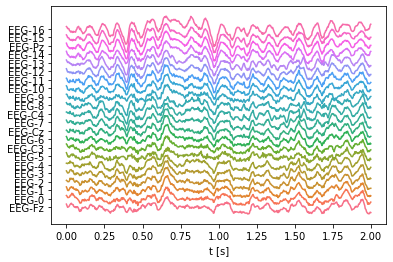

In [ ]:
#eeg original trial i
i = 1
plot_eeg(data=Xraw[i],sample_rate=fs,channels_names=[raw.ch_names[i] for i in Ch])
plt.xlabel('t [s]')

In [ ]:
!pip install pycwt #instalar paquete

     |████████████████████████████████| 758 kB 19.8 MB/s 
  Created wheel for pycwt: filename=pycwt-0.3.0a22-py3-none-any.whl size=17825 sha256=1c513fb0fac3a4c0b5e1a769c1cad0100a64cb031a114822451993f7ff630b03
  Stored in directory: /root/.cache/pip/wheels/53/99/6b/a43c99414482c20862ca8917862237de8bd27ee795a55faa6c
Successfully built pycwt


Para la banda alfa 8-14 Hz canal 9

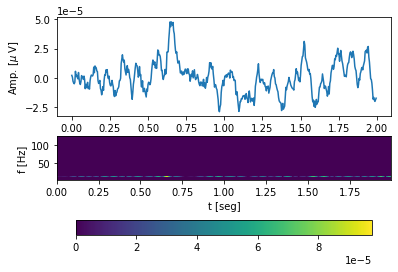

(120, 500)


In [ ]:

import pycwt as wavelet
#trial y canal de prueba
trial = 1
chi = 9
#Ejemplo con mexican hat 
mother =  wavelet.MexicanHat()
dj = 1/12 #resolucion en frecuencia
wave, scales, freqs, coi, fft, fftfreqs = wavelet.cwt(Xraw[trial,chi,:],dt=1/fs,wavelet=mother,dj=dj)#,freqs=np.fft.rfftfreq(Xraw.shape[2],1/fs))
#determinar banda de interes - pasa banda
ind = (freqs >= 8) & (freqs<=12)
# pesos en 0 por fuera de la banda de interés
wave[~ind,:] = 0


fig, ax = plt.subplots(2, 1)
vt = np.arange(0,Xraw.shape[2]/fs,1/fs)
ax[0].plot(vt,Xraw[trial,chi,:])
ax[0].set_ylabel("Amp. [$\mu$ V]")
im = ax[1].pcolormesh(vt, freqs, abs(wave))
fig.colorbar(im, ax=ax[1],orientation="horizontal",pad=0.4)
plt.gca()
plt.xlabel('t [seg]')
plt.ylabel('f [Hz]')
plt.show()
print(wave.shape)

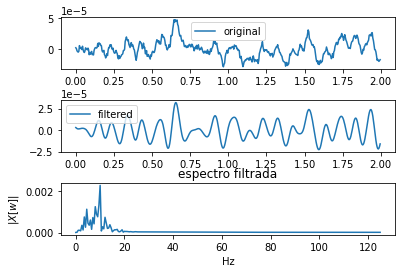

In [ ]:
#transformada inversa para filtrado
xe = wavelet.icwt(wave, scales, dt=1/fs,wavelet= mother,dj=dj)
#pintar espectro
vf = np.fft.rfftfreq(len(xe),1/fs)  # pasar eje x a Hz segun  numero de puntos y periodo muestreo
xefft = np.fft.rfft(xe)

plt.subplot(311)
plt.plot(vt,Xraw[trial,chi,:],label='original')
plt.legend()

plt.subplot(312)
plt.plot(vt,xe,label='filtered')
plt.legend()


plt.subplot(313)
plt.plot(vf,abs(xefft))
plt.xlabel('Hz')
plt.ylabel('$|X[w]|$')
plt.title('espectro filtrada')

plt.subplots_adjust(hspace=0.6,wspace=0.6)
plt.show()

Para la banda beta 12-30 Hz canal 5

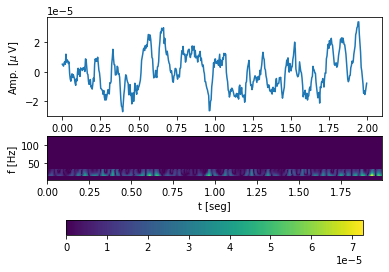

(120, 500)


In [ ]:
import pycwt as wavelet
#trial y canal de prueba
trial = 1
chi = 5
#Ejemplo con mexican hat 
mother =  wavelet.MexicanHat()
dj = 1/12 #resolucion en frecuencia
wave, scales, freqs, coi, fft, fftfreqs = wavelet.cwt(Xraw[trial,chi,:],dt=1/fs,wavelet=mother,dj=dj)#,freqs=np.fft.rfftfreq(Xraw.shape[2],1/fs))
#determinar banda de interes - pasa banda
ind = (freqs >= 12) & (freqs<=30)
# pesos en 0 por fuera de la banda de interés
wave[~ind,:] = 0


fig, ax = plt.subplots(2, 1)
vt = np.arange(0,Xraw.shape[2]/fs,1/fs)
ax[0].plot(vt,Xraw[trial,chi,:])
ax[0].set_ylabel("Amp. [$\mu$ V]")
im = ax[1].pcolormesh(vt, freqs, abs(wave))
fig.colorbar(im, ax=ax[1],orientation="horizontal",pad=0.4)
plt.gca()
plt.xlabel('t [seg]')
plt.ylabel('f [Hz]')
plt.show()
print(wave.shape)

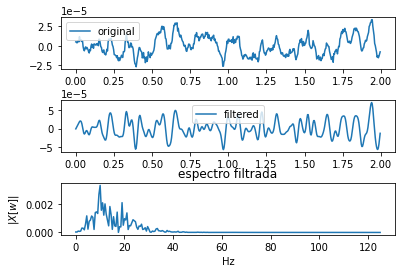

In [ ]:
#transformada inversa para filtrado
xe = wavelet.icwt(wave, scales, dt=1/fs,wavelet= mother,dj=dj)
#pintar espectro
vf = np.fft.rfftfreq(len(xe),1/fs)  # pasar eje x a Hz segun  numero de puntos y periodo muestreo
xefft = np.fft.rfft(xe)

plt.subplot(311)
plt.plot(vt,Xraw[trial,chi,:],label='original')
plt.legend()

plt.subplot(312)
plt.plot(vt,xe,label='filtered')
plt.legend()


plt.subplot(313)
plt.plot(vf,abs(xefft))
plt.xlabel('Hz')
plt.ylabel('$|X[w]|$')
plt.title('espectro filtrada')

plt.subplots_adjust(hspace=0.6,wspace=0.6)
plt.show()

-la restricción es que cada que quiera filtrar hay que tomar la señal, aplicar la transformada y regresar, lo que implica costos; es mas flexible y potente que fourier pero implica mayor capacidad computacional al no tener una transformada rapida. sin embargo fourier esta presente incluso para realizar interpretaciones mas potentes